# ECS 22 - Lab 5: Rheology

This lab is designed to explore some of the common mathematical relationships used to relate stress to strain in rocks. These mathematical formulations are critically important because they are frequently the basis for numerical models of all kinds of Earth processes, which are increasingly common. This lab is also designed to expose you to some of the ways that coding in Python can be useful for exploring concepts in structural geology and other disciplines in the Earth Sciences

### Python Basics

Many common mathematical operations are relatively straightforward in Python. Below are some basic examples of how to assign variables, do arithmetic, and print output. Feel free to modify and run the cell to see how the output changes.

In [49]:
x = 5
y = 7
z = x*y
print(z)

35


### Python Packages

For more advanced math and plotting, we will need to import the packages `numpy` and `matplotlib` and assign them shorthands (`np` and `plt`). Run the cell below to import these packages. If there is no output, that is good! It means the imports were successful.

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf

`numpy` lets us do mathematical operations like trig functions. the below code converts 45 degrees to radians (because numpy does trig functions in radians) and then takes the tangent of the resulting value. Try changing the value and seeing how the answer changes, or try a different trig function.

In [51]:
x = np.tan(np.radians(45))
print(x)

0.9999999999999999


`matplotlib` allows us to plot things. The below code creates a `numpy` array of angles ranging from 0 to 90 degrees, converts them to radians, and gets the tangent of each one. Then, `matplotlib` plots the angles on the x axis and the tangents on the y axis. Note that we can add comments directly to Python code by starting lines with `#`, which tells Python not to run the line as code

Text(0, 0.5, 'Tangents')

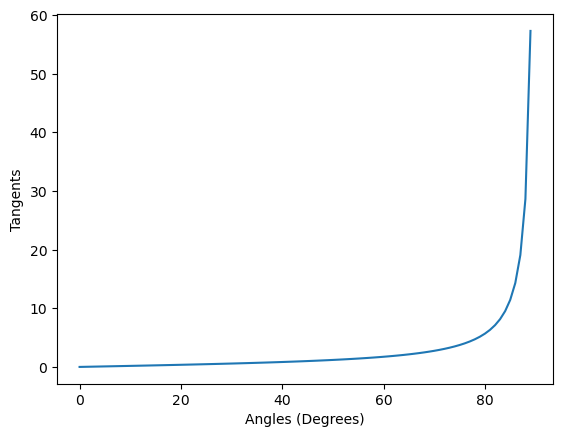

In [52]:
# Creates an array of values from 0 to 90
angles = np.arange(0,90,1)

# Converts angles from degrees to radians
angles_radians = np.radians(angles)

# Takes tangent of each angle
tangents = np.tan(angles_radians)

# Plots angles vs. tangents
plt.plot(angles,tangents)

# Sets x and y axes labels
plt.xlabel('Angles (Degrees)')
plt.ylabel('Tangents')

### Elastic Deformation

In elastic deformation, material undergoes strain (e) in response to stress ($\sigma$), but all of the strain is recoverable (i.e., the material returns to its original shape when the stress is removed). This is often visualized using a spring, and the relationship between stress and strain is often linear:

<img src='elastic.png' width='800'>

This linear relationship is called __Hooke's Law__, and the factor _E_ relating stress to strain is __Young's Modulus__ or the __elastic modulus__.

$\sigma = Ee$

1. Using Python code below, calculate the elastic modulus for a rock with 20% elastic elongation at 150 MPa. Note that the elastic modulus is not dimensionless.

In [53]:
# Calculate elastic modulus for a rock with 20% extension at 150 MPa. Print the elastic modulus.

sigma = 150 #MPa
e = 0.2
elastic = sigma/e

print(elastic, ' MPa')

750.0  MPa


Below is a table of elastic moduli for some common Earth materials:

<img src='elastic_table.png' width=350>

2. Create a `numpy` array of possible elastic moduli for gabbro in increments of 10 MPa. Make a plot of stress vs. strain showing the stress for each of these elastic moduli. The functions you need have been written below and can be used by removing the `#` and modifying the appropriate values.

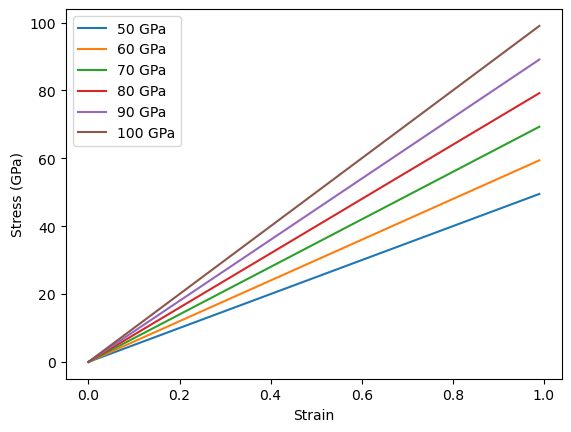

In [54]:
# Make an array of strains from 0% to 100%
strains = np.arange(0,1,0.01)

# Make an array of all gabbro moduli
moduli = np.arange(50,100+1,10) # GPa

# Calculate stress for each of these moduli
for modulus in moduli:
    stresses = strains*modulus
    plt.plot(strains,stresses,label=str(modulus) + ' GPa')

# Add labels to the axes and a legend
plt.xlabel('Strain')
plt.ylabel('Stress (GPa)')
plt.legend()

# Save the plot
plt.savefig('out_moduli.jpg')

3. What stresses are needed to cause 40% elongation in gabbro with each of these elastic modulii? For this, you can use the `np.where` function.

In [55]:
for modulus in moduli:
    stresses = strains*modulus
    stress_40 = stresses[np.where(strains==0.4)]
    print('Elastic Modulus: ',modulus,' GPa')
    print('Stress at 40% elongation: ', stress_40[0],' GPa')
    print('')

Elastic Modulus:  50  GPa
Stress at 40% elongation:  20.0  GPa

Elastic Modulus:  60  GPa
Stress at 40% elongation:  24.0  GPa

Elastic Modulus:  70  GPa
Stress at 40% elongation:  28.0  GPa

Elastic Modulus:  80  GPa
Stress at 40% elongation:  32.0  GPa

Elastic Modulus:  90  GPa
Stress at 40% elongation:  36.0  GPa

Elastic Modulus:  100  GPa
Stress at 40% elongation:  40.0  GPa



### Viscous and Plastic Deformation

Elasticity is particularly relevant in the brittle regime, where materials essentially deform elastically until they reach some critical stress that induces mechanical fracturing, faulting, and earthquakes. Below the brittle-ductile transition (~10 km), rocks tend to accumulate permanent viscous or plastic deformation without brittle failure.

#### Viscous Deformation

At high temperatures and million-year timescales, rocks can effectively behave like fluids (i.e., they have a viscous rheology). Some fluids are __Newtonian__, meaning that there is a linear relationship between stress and strain, depending on the __viscosity__ ($\eta$ - resistance to flow) of the fluid:

$\sigma_s = \eta \dot \gamma$

$\sigma_n = \eta \dot e$

Note that in these formulas, $\dot \gamma$ is shear strain _rate_ and $\dot e$ is elongation strain _rate_. Strain rate refers to strain over a period of time and has units of per unit time (e.g., $s^{-1}, yr^{-1}, Myr^{-1})$. Since this strain is permanent, strain will accumulate with time at the same amount of stress.

This is often visualized using a dashpot, which requires a fluid (like air) to flow to be extended, and the resistance to extension is determined by the viscosity of the fluid:

<img src=dashpots.jpg width=400>

<img src=linear_viscous.png width=800>

1. Using the Python code from the elastic deformation code above as a model, plot normal stress ($\sigma_n$) vs. strain rate ($\dot e$) for normal stresses up to 100 GPa for fluids with viscosities of $1 \cdot 10^{16} Pa \cdot s$ and $1 \cdot 10^{20} Pa \cdot s$ (in Python you can represent these in scientific notation as `1e16` and `1e20`). Use a log-log scale (`plt.loglog`) to visualize the results. 

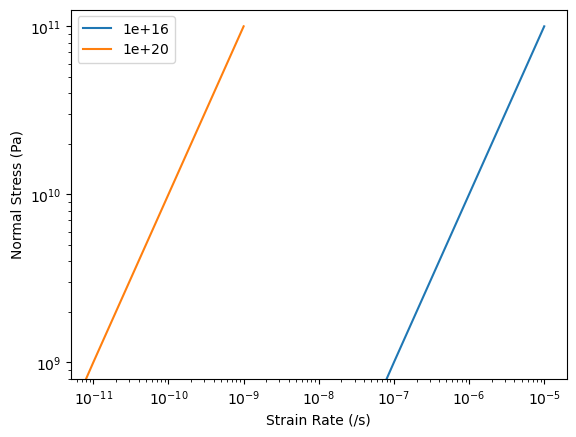

In [56]:
# Make array of stresses
stresses_GPa = np.arange(0,100+1,1) # GPa

# Convert to Pa
stresses_Pa = stresses_GPa * 1e9 #Pa

# Define viscosities
visc1 = 1e16 # Pa*s
visc2 = 1e20 # Pa*s

# Calculate strain rates
strain_rate1 = stresses_Pa/visc1
strain_rate2 = stresses_Pa/visc2

# Plot

plt.plot(strain_rate1,stresses_Pa,label=visc1)
plt.plot(strain_rate2,stresses_Pa,label=visc2)
plt.xlabel('Strain Rate (/s)')
plt.ylabel('Normal Stress (Pa)')
plt.loglog()
plt.legend()
plt.savefig('out_newtonian.jpg')



2. What strain rates correspond to 10 GPa for each viscosity?

In [57]:
sr_10_visc1 = strain_rate1[np.where(stresses_GPa==10)]
sr_10_visc2 = strain_rate2[np.where(stresses_GPa==10)]

print('Viscosity: ',visc1,' Pa*s')
print('Strain rate at 10 GPa: ', float(sr_10_visc1),' /s')
print('')

print('Viscosity: ',visc2,' Pa*s')
print('Strain rate at 10 GPa: ', float(sr_10_visc2),' /s')
print('')

Viscosity:  1e+16  Pa*s
Strain rate at 10 GPa:  1e-06  /s

Viscosity:  1e+20  Pa*s
Strain rate at 10 GPa:  1e-10  /s



/tmp/ipykernel_180517/2129619108.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Strain rate at 10 GPa: ', float(sr_10_visc1),' /s')
/tmp/ipykernel_180517/2129619108.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Strain rate at 10 GPa: ', float(sr_10_visc2),' /s')


#### Plastic Deformation

In purely viscous deformation, fluids will undergo strain under any deviatoric stress conditions. This is the not the case for most rocks, which will not undergo permanent deformation until stresses exceed some __yield stress__, above which strain starts to accumulate. This is visualized by trying to slide a block along some surface with frictional resistance.

<img src='plastic.png' width=800>

In a perfectly plastic material, strain accumulates at a constant stress. This doesn't make for very interesting math. This is also rarely the case in flowing rocks, which instead are often better approximated by a viscoplastic rheology.

### Viscoplastic Deformation

Rocks below the brittle-plastic (or brittle-ductile) transition are probably best described by viscoplastic deformation, in which material deforms viscously once (i.e., as a function of stress and viscosity) once some critical yield stress is reached:

<img src='viscoplastic.png' width=800>

To quantify viscoplastic deformation, we first need to look more closely at viscosity, which is highly dependent on a number of variables, including the properties of the material being deformed (e.g., activation energy), the temperature, and the gas constant. Here is one simplified form of an equation for viscosity:

$\eta = A_o\exp(E/(R T))$

Here, $A_o$ is a viscous prefactor and E is activation energy, both of which are constant for particular materials. T is temperature, and R is the gas constant (8.31451 $J/K \cdot mol$).

Using this particular formulation of viscosity, the relationship between the plastic yield stress ($\sigma$) and strain rate ($\dot e$) is:

$\sigma = 2 \eta \dot e$

3. Calculate the viscoplastic yield stress for olivine over a temperature range from 273-1673 K and plot temperature (y-axis) against yield stress (x-axis). Use the following values:

Viscous Prefactor: $15555555.55$

Activation Energy: $335 \cdot 10^{3} \frac{J}{mol \cdot K}$

Strain Rate: $1 \cdot 10^{-15} s^{-1}$

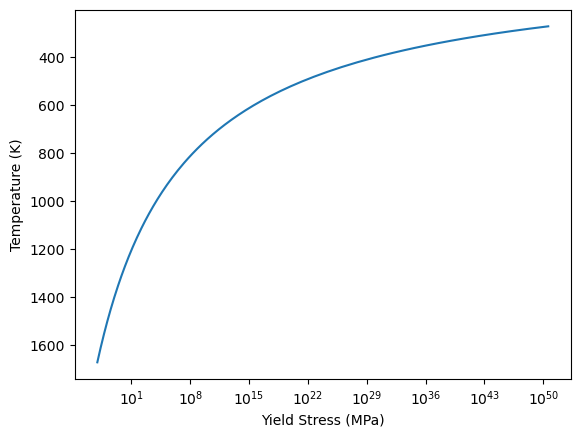

In [58]:
# Define constants
Ao = 15555555.55 
E = 335e3 # J/mol*K
strain_rate = 1e-15 # /s
R = 8.31451 # J/mol*K

# Make temperature array
T = np.arange(273,1673+1,10) # K

# Calculate viscosities
eta = Ao * np.exp(E/(R*T)) # Pa*s

# Calculate yield stress
yield_stress = 2* eta * strain_rate # Pa

#Plot
plt.plot(yield_stress/1e6, T)
plt.gca().invert_yaxis()
plt.xscale('log')
plt.xlabel('Yield Stress (MPa)')
plt.ylabel('Temperature (K)')
plt.savefig('out_viscoplastic.jpg')

You may notice that at low temperatures, olivine will require enormous stresses (up to $~10^{50} MPa$) to deform viscoplastically, but obviously at these temperatures rocks will undergo brittle fracture at much lower stress.

If we want to get some estimate of the overall strength of the lithosphere, we can combine the viscoplastic rheology above for the deeper parts of the lithosphere with an estimate of brittle strength using Byerlee's Law:

$\sigma_s = 0.85\sigma_n$ when $\sigma_n < 200$ MPa<br>
$\sigma_s = 60 + 0.6\sigma_n$, when $\sigma_n > 200$ MPa<br>

For our purposes, we will use lithostatic stress (i.e., pressure) to approximate $\sigma_n$, and $\sigma_s$ is the critical shear stress roughly equivalent to the plastic yield stress we are using for viscoplasticity.

4. Using Byerlee's Law, calculate the critical stress of the lithosphere for depths ranging from 0 to 150 km. Plot depth vs critical stress.

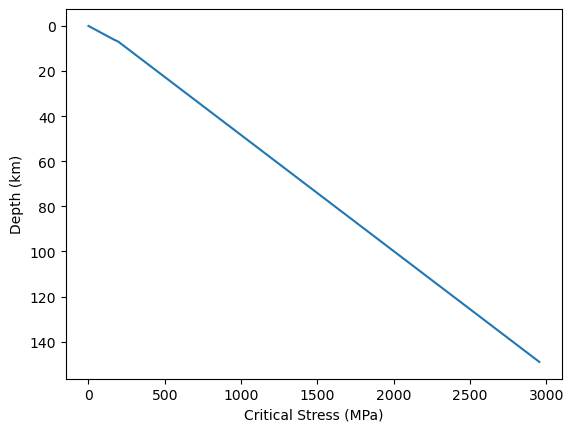

In [59]:
# Calculate pressure with depth
depths = np.arange(0,150000,1000) # m
density = 3300 # kg*m^-3
g = 9.81 # m*s^-2

sigma_n = depths*density*g # Pa

# Use np.where and np.min to determine where stress <200 MPa and >200 MPa
under = np.where(sigma_n<=200e6)
over = np.where(sigma_n>200e6)

# Calculate <200 MPa critical stresses
crit_stress1 = sigma_n[under]*0.85 # Pa

# Calculate >200 MPa
crit_stress2 = 60e6 + sigma_n[over]*0.6 # Pa

# Combine
crit_stress_combined = np.concatenate([crit_stress1,crit_stress2]) # Pa

# Plot as MPa vs km
plt.plot(crit_stress_combined/1e6,depths/1000)
plt.gca().invert_yaxis()
plt.xlabel('Critical Stress (MPa)')
plt.ylabel('Depth (km)')
plt.savefig('out_byerlee.jpg')


To fully combine these two rheologies, we need to establish a relationship of temperature to depth for our viscoplastic component. I've done this for you below, just run the cell:

In [60]:
# Define a temperature profile for the lithosphere (half-space cooling model)
kappa = 1e-6  # m^2/s, diffusivity
Ts = 273      # K, surface temperature
Tm = 1673     # K, mantle temperature

sec2yr = 3600*24*365   # s/yr
age_sec = 80e6*sec2yr   # s, age of the lithosphere in seconds

# Calculate the temperature profile
T_withdepth = Ts + (Tm - Ts)*erf(depths/(2*np.sqrt(kappa*age_sec))) # K

5. Recalculate viscosities using this new temperature profile, then plot stress vs. depth for both brittle and viscoplastic deformation

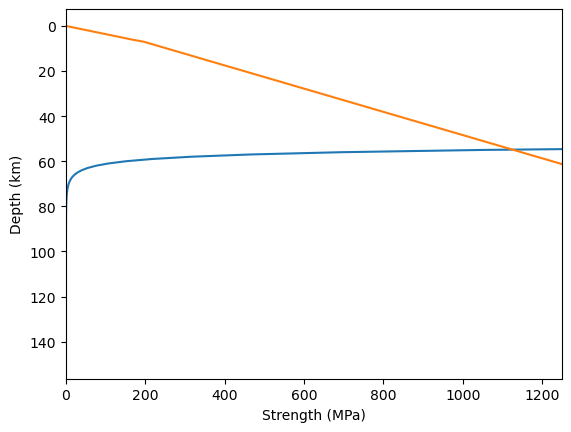

In [61]:
# Calculate viscosities
eta = Ao * np.exp(E/(R*T_withdepth))

# Calculate yield stress
yield_stress = 2* eta * strain_rate

# Plot
plt.plot(yield_stress/1e6,depths/1000)
plt.plot(crit_stress_combined/1e6,depths/1000)
plt.gca().invert_yaxis()
plt.xlabel('Strength (MPa)')
plt.ylabel('Depth (km)')
plt.xlim(0,1250)
plt.savefig('out_tree1.jpg')

Note that the critical shear stress defined by Byerlee's law is much lower than the viscoplastic yield stress at lower depths, whereas the viscoplastic yield stress is lower at high depths. By combining theses curves at their minimum values, we can create a __strength profile__ showing the stress required to initiate deformation (either brittle or viscoplastic) at any given depth. Because of their shape, these are informally called "Christmas tree diagrams."

6. Use np.minimum to find the minimum stress value at each depth and plot the resulting strength profile. At what stress will olivine deform at 40 km depth? What about 70 km depth?

Strength at 40 km:  836.952  MPa
Strength at 70 km:  7.069203116707475  MPa


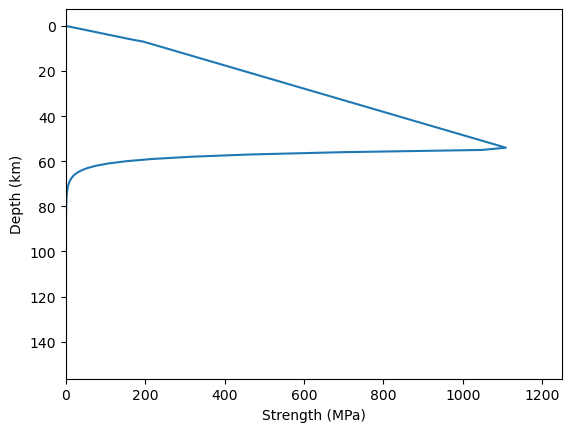

In [62]:
strength = np.minimum(crit_stress_combined,yield_stress) # Pa

plt.plot(strength/1e6,depths/1000)
plt.gca().invert_yaxis()
plt.xlabel('Strength (MPa)')
plt.ylabel('Depth (km)')
plt.xlim(0,1250)
plt.savefig('out_tree2.jpg')

strength_40km = strength[np.where(depths==40e3)]
print('Strength at 40 km: ',strength_40km[0]/1e6,' MPa')

strength_70km = strength[np.where(depths==70e3)]
print('Strength at 70 km: ',strength_70km[0]/1e6,' MPa')